In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# Set Parameters
k=10
cv2b=0.8;
#shape k
#scale theta
mean_ton=2
mean_tof=4
mean_t_transcript=1/k

cv2on=.15
cv2of=.8
cv2_t_transcript=.5



vari_ton=cv2on*mean_ton**2    #mean*cv2
vari_tof=cv2of*mean_tof**2
vari_t_transcript=cv2_t_transcript*mean_t_transcript**2


scaleon=vari_ton/mean_ton
scaleof=vari_tof/mean_tof
scaletranscript=vari_t_transcript/mean_t_transcript

shapeon=mean_ton**2/vari_ton
shapeof=mean_tof**2/vari_tof
shapetranscript=mean_t_transcript**2/vari_t_transcript

#ton = np.random.gamma(shapeon, scaleon, num)
#tof=np.random.gamma(shapeof, scaleof, num)
#print(ton)
#print(tof)
#ton.shape
#tof.shape


In [3]:
#------ "One step" decay+ gene switching model+ Gamma distributed ON and OFF intervals
#------- + Poissonian transcription+ Geometric burst size

def gettr():
    if s==1:
        tr=np.random.gamma(shapeof, scaleof)
    else:
        tr=np.random.gamma(shapeon, scaleon)
    return tr

def evolve(lamb,tmax,s,tr,x):
    t=0
    def gettrr(x):
        if x>0:
            ct2=np.random.exponential(1/(gam*x))
        else:
            ct2=1000000000000000000
        if s==1:
            ct1=np.random.exponential(1/(k))           
            trr=np.min([tr,ct1,ct2])
            react=np.argmin([tr,ct1,ct2])
        else:
            ct1=10000000000000000000
            trr=np.min([tr,ct1,ct2])
            react=np.argmin([tr,ct1,ct2])
        return trr,react
    
    trr,react=gettrr(x)
    if trr>tmax:
        tr+=-tmax
        return s,tr,x
    else:
        while t+trr<tmax:
            t=t+trr
            tr+=-trr
            if react==0:
                if s==0:
                    s=1
                else:
                    s=0
                tr=gettr()
            elif react==1:
                x+= np.random.geometric(p=1/5)
            else:
                x+=-1
            
            trr,react=gettrr(x)
        tr-=tmax-t
        
        return s,tr,x

In [6]:
df=pd.DataFrame([],columns=['Time','State','Tr','mRNA',"Itt"])

In [7]:
#One step  decay model
for iii in np.arange(4000):
    gam=1
    t=0
    dt=0.005
    s=0
    data=[]
    lamb=1
    tmax1=20
    tr=gettr()
    x=np.random.randint(40)
    while t<tmax1:
        s,tr,x=evolve(lamb=lamb,tmax=dt,s=s,tr=tr,x=x)
        t+=dt
        data.append([t,s,tr,x,iii])
        #print(s,t)

    #one step model theory
    df1=pd.DataFrame(data,columns=['Time','State','Tr','mRNA','Itt'])
    #print(np.mean(df1.mRNA))
    #print(np.var(df1.mRNA)/(np.mean(df1.mRNA))**2)
    #print(np.var(df1.mRNA)/(np.mean(df1.mRNA)))
    df=pd.concat([df,df1])
    

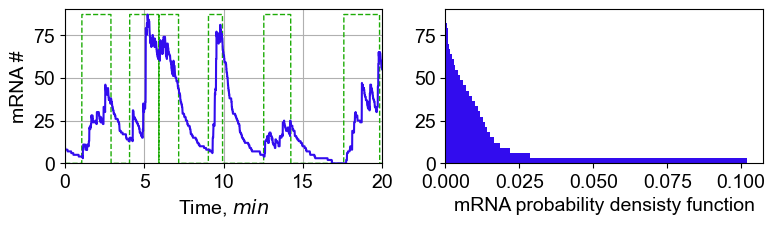

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(9, 2))
# Set font to Times New Roman for labels
#font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 14}
font = {'family': 'Arial', 'weight': 'normal', 'size': 14}


plt.rc('font', **font)

ax[0].plot(df1.Time,87*df1.State,color='#1DAC06',lw=1,linestyle='--')
ax[0].plot(df1.Time,df1.mRNA,color='#320CEE')
#plt.plot(df1.Time,df1.mRNAY)
#plt.plot(df1.Time,df1.mRNA)
ax[0].set_xlim(0,20)
ax[0].set_ylim(0,90)
ax[0].grid()
ax[0].set_yticks([0,25,50,75])
ax[0].set_xlabel(r"Time, $min$")
ax[0].set_ylabel(r"mRNA #")
ax[1].hist(df.mRNA,bins=50,orientation='horizontal',density=True,  color='#320CEE')
ax[1].set_yticks([0,25,50,75])
ax[1].set_xticks([0,25e-3,5e-2,75e-3,1e-1])
ax[1].set_ylim(0,90)
ax[1].set_xlabel(r"mRNA probability densisty function")
plt.savefig('trajectory.svg', format='svg')


Text(0, 0.5, 'mRNA #')

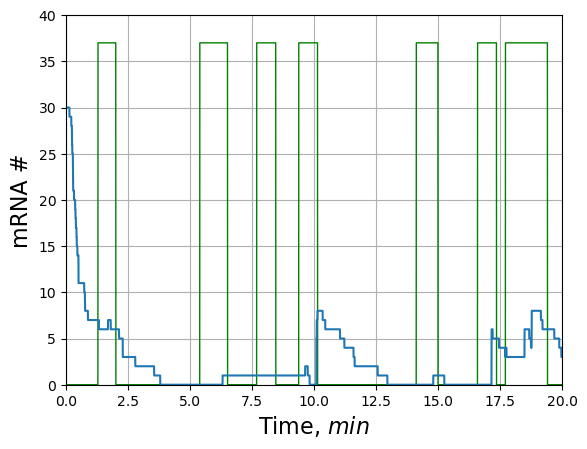

In [34]:
plt.plot(df1.Time,37*df1.State,color='green',lw=1)
plt.plot(df1.Time,df1.mRNA)
#plt.plot(df1.Time,df1.mRNAY)
#plt.plot(df1.Time,df1.mRNA)
plt.xlim(0,20)
plt.ylim(0,40)
plt.grid()
plt.xlabel(r"Time, $min$", fontsize=16)
plt.ylabel(r"mRNA #", fontsize=16)

In [7]:
#------ "Two step" decay+ gene switching model+ Gamma distributed ON and OFF intervals
#------- + Poissonian transcription+ Geometric burst size
def gettr():
    if s==1:
        tr=np.random.gamma(shapeof, scaleof)
    else:
        tr=np.random.gamma(shapeon, scaleon)
    return tr

def evolve2(lamb,tmax,s,tr,x,y,m):
    timer=0
    def gettrr(x,y):
        if x>0:
            ct2=np.random.exponential(1/(gam*x))
        else:
            ct2=1000000000000000000
        if y>0:
            ct3=np.random.exponential(1/(gam*y))
        else:
            ct3=1000000000000000000
        if s==1:
            ct1=np.random.exponential(1/(k))           
            trr=np.min([tr,ct1,ct2,ct3])
            react=np.argmin([tr,ct1,ct2,ct3])
        else:
            ct1=10000000000000000000
            trr=np.min([tr,ct1,ct2,ct3])
            react=np.argmin([tr,ct1,ct2,ct3])
        return trr,react
    
    trr,react=gettrr(x,y)
    m=x+y
    if trr>tmax:
        tr+=-tmax
        return s,tr,x,y,m
    else:
        while timer+trr<tmax:
            timer=timer+trr
            tr+=-trr
            if react==0:
                if s==0:
                    s=1
                else:
                    s=0
                tr=gettr()
            elif react==1:
                x+= np.random.geometric(p=1/5)
            elif react==2:
                x+=-1
                y+=1
            else:
                y+=-1
            
            trr,react=gettrr(x,y)
        tr-=tmax-timer
        m=x+y
        return s,tr,x,y,m

In [11]:
#Two step decay model
gam=2
t=0
dt=0.1
s=0
data=[]
lamb=1
tend=5000
tr=gettr()
x=0
y=0
m=x+y
while t<tend:
    s,tr,x,y,m=evolve2(lamb=lamb,tmax=dt,s=s,tr=tr,x=x,y=y,m=m)
    t+=dt
    data.append([t,s,tr,x,y,m])
    #print(s,t)
#one step model
df=pd.DataFrame(data,columns=['Time','State','Tr','mRNAX','mRNAY','mRNAT'])
mean_sim=np.mean(df.mRNAT)
print("mean_sim_two_step=",mean_sim)
var_sim=np.var(df.mRNAT)
#print("cv2_sim_two_step=",var_sim/mean_sim**2)
print("FF_sim_two_step=",var_sim/mean_sim)

mean_sim_two_step= 10.54008
FF_sim_two_step= 26.940872706237094


Text(0, 0.5, 'RNA #')

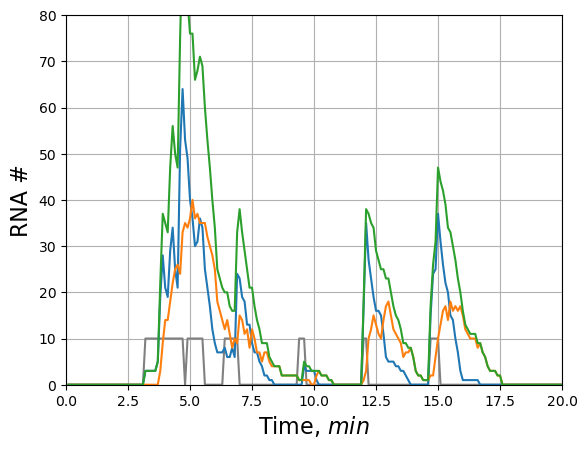

In [12]:
plt.plot(df.Time,10*df.State,color='gray')
plt.plot(df.Time,df.mRNAX)
plt.plot(df.Time,df.mRNAY)
plt.plot(df.Time,df.mRNAT)
plt.xlim(0,20)
plt.ylim(0,80)
plt.grid()
plt.xlabel(r"Time, $min$", fontsize=16)
plt.ylabel(r"RNA #", fontsize=16)

1 2 3


4070784

In [20]:
np.var(df.mRNAT)/(np.mean(df.mRNAT))**2

0.8362387210300473

In [125]:
np.var(df.mRNAY)/(np.mean(df.mRNAY))**2

1.5783008138344883

In [124]:
np.var(df.mRNAX)/(np.mean(df.mRNAX))**2

2.097774459111875

In [17]:
mean_ton/(mean_ton+mean_tof)

0.3333333333333333

In [ ]:
t=0
dt=0.001
s=0
data=[[t,s]]
lamb=1
tmax=
while t<tmax:
    s=evolve(lamb=lamb,tmax=dt,s=s)
    t+=dt
    data.append([t,s])
    #print(s,t)
df=pd.DataFrame(data,columns=['Time','State'])
plt.plot(df.Time,df.State,marker='o',markersize=1)
#plt.xlim([0,10])
plt.xlabel('Time')
plt.ylabel('State')
#plt.plot([0.5,0.5],[-0.1,1.1],'k--')

In [ ]:
ncells=10000
data=[]
for cell in range(1000):
    t=0
    dt=0.01
    s=0
    lamb=10
    tmax=10
    while t<tmax:
        s=evolve(lamb=lamb,tmax=dt,s=s)
        t+=dt
        data.append([cell,t,s])

In [ ]:
dfcells=pd.DataFrame(data,columns=['Cell','Time','State'])

In [ ]:
data=[]
for time in dfcells.Time.unique():
    dft= dfcells[dfcells.Time==time]
    mnt=np.mean(dft.State)
    var=np.var(dft.State)
    data.append([time,mnt,var])
df=pd.DataFrame(data,columns=['Time','MeanState','Var'])

In [ ]:
plt.plot(df.Time,df.MeanState)
#plt.plot(df.Time,(1-np.exp(-2*lamb*df.Time))/2)
plt.xlim(0,1)

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
mean_th=(k/(2*gamma)*mb)*mean_ton/(mean_ton+mean_tof)
print("mean_theory_two_step=",mean_th)
mb2=(mb**2)*(cv2b+1)
egton = 1/((1 + gamma*mean_ton *cv2on)**(1/cv2on));
egtof = 1/((1 + gamma* mean_tof* cv2of)**(1/cv2of));
cv2x = ((gamma *mb2)/(2 *k *mb**2)) *(1 + mean_tof/mean_ton) + (gamma/(2* k* mb)) *(1 +  mean_tof/ mean_ton) + ((1 - egtof)* (1 - egton) *(mean_tof + mean_ton ))/((-1 + egtof *egton) *gamma* mean_ton**2) + mean_tof/mean_ton;
print("cv2x_theory_two_step=",cv2x)
df=pd.DataFrame(data,columns=['Time','State','Tr','mRNAX','mRNAY','mRNAT'])
mean_sim=np.mean(df.mRNAT)
print("mean_sim_two_step=",mean_sim)

In [3]:
#One step model with timer dependent transcription
def gettr():
    if s==1:
        tr=np.random.gamma(shapeof, scaleof)
    else:
        tr=np.random.gamma(shapeon, scaleon)
    return tr


def evolve3(lamb,tmax,s,tr,x):
    timer=0
    def gettrr(x):
        #------ decay ---------#
        if x>0:
            ct2=np.random.exponential(1/(gam*x))   
        else:
            ct2=1000000000000000000

        #------ transcription ---------#
        if s==1: # Gene ON
            ct1=np.random.gamma(shapetranscript, scaletranscript)          
            trr=np.min([tr,ct1,ct2])
            react=np.argmin([tr,ct1,ct2])
            #print('ct1:',ct1)
            #print('ct2:',ct2)
            #print('tr:',tr)
            #print('trr:',trr)

        else: # Gene OFF
            ct1=10000000000000000000
            trr=np.min([tr,ct1,ct2])
            react=np.argmin([tr,ct1,ct2])
            #print('ct1:',ct1)
            #print('ct2:',ct2)
        return trr,react
    trr,react=gettrr(x)
    #print('trr:',trr)
    #print('react:',react)
    #print('tmax:',tmax)
    if trr>tmax:   
        tr+=-tmax
        #print('tr:',tr)
        return s,tr,x
    else:
        while timer+trr<tmax:
            timer=timer+trr
            #print('timer:',timer)
            tr+=-trr
            #print('tr:',tr)
            #print('react:',react)
            if react==0:
                if s==0:
                    s=1
                    #print('s changed to one')    
                else:
                    s=0
                    #print('s changed to zero')
                tr=gettr()
                
            elif react==1:
                x+= np.random.geometric(p=1/5)
                #print('x:',x)
            else:
                x+=-1
                #print('x:',x)
            trr,react=gettrr(x)
        tr-=tmax-timer
        #print('tr:',tr)
        return s,tr,x

In [8]:
#One step model
gam=1
dt=0.005
data=[]
lamb=1
tend=5000
t=0
s=0
tr=gettr()
x=0
while t<tend:
    s,tr,x=evolve3(lamb=lamb,tmax=dt,s=s,tr=tr,x=x)
    t+=dt
    #print('t:',t)
    data.append([t,s,tr,x])

#one step model theory
df2=pd.DataFrame(data,columns=['Time','State','Tr','mRNA'])
print(np.mean(df2.mRNA))
#print(np.var(df1.mRNA)/(np.mean(df1.mRNA))**2)
print(np.var(df2.mRNA)/(np.mean(df2.mRNA)))


3.097048
4.85665759322456


Text(0, 0.5, 'RNA #')

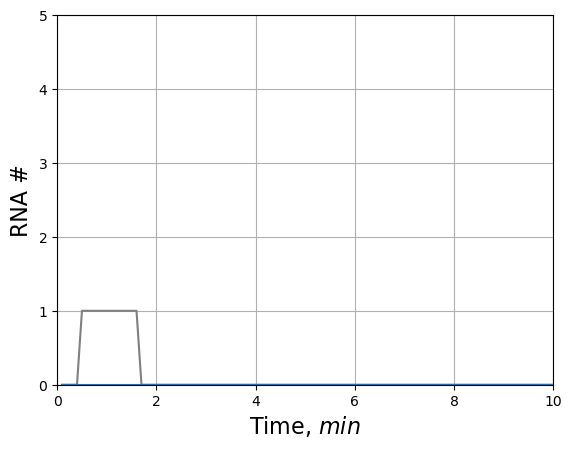

In [131]:
plt.plot(df2.Time,df2.State,color='gray')
plt.plot(df2.Time,df2.mRNA)
plt.xlim(0,10)
plt.ylim(0,5)
plt.grid()
plt.xlabel(r"Time, $min$", fontsize=16)
plt.ylabel(r"RNA #", fontsize=16)